In [1]:
import pandas as pd
import numpy as np
import multiprocessing as mp
from functools import reduce
import io
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
import sklearn

In [2]:
data = pd.read_csv('./mnist.csv').to_numpy()
X = data[:,1:]
y = data[:,0]

In [3]:
# Question 1

def standardize(X):
    standardizedArray = np.zeros(shape=np.shape(X))
    tempArray = np.zeros(np.shape(X)[1])
    
    for i in range(np.shape(X)[1]):
        mean = np.mean(X[:, i])
        std = np.std(X[:, i])
        if std == 0:
            std = 1
        tempArray = np.empty(0)
    
        for element in X[:, i]:
            tempArray = np.append(tempArray, ((element - mean) / std))
    
        standardizedArray[:,i] = tempArray

    return standardizedArray

def projectionMatrix(eigen_vectors, num):
    projection_matrix = (eigen_vectors.T[:][:num]).T
    return projection_matrix

std = standardize(X)
cov = np.cov(std, rowvar=False)

eigen_values, eigen_vectors = np.linalg.eig(cov)
projection_matrix = projectionMatrix(eigen_vectors, 10)

PCA = np.dot(std, projection_matrix)
COV = np.cov(PCA, rowvar=False)
print(COV)

[[ 4.07352456e+01+0.j -4.04954866e-14+0.j -5.78841187e-16+0.j
   3.03265989e-15+0.j  8.98425493e-15+0.j -2.15129311e-15+0.j
  -9.00083979e-15+0.j  1.32678870e-15+0.j  1.47107697e-14+0.j
  -2.70096272e-15+0.j]
 [-4.04954866e-14+0.j  3.02888435e+01+0.j -4.78496869e-14+0.j
   6.88508566e-15+0.j  1.06143096e-15+0.j -1.36469695e-15+0.j
  -8.49144770e-15+0.j -3.11084566e-15+0.j -1.36665160e-14+0.j
   3.70849289e-15+0.j]
 [-5.78841187e-16+0.j -4.78496869e-14+0.j  2.73577414e+01+0.j
  -1.70871431e-14+0.j  3.82873311e-15+0.j -4.63902193e-15+0.j
   4.59637515e-16+0.j -5.23311526e-15+0.j  6.12218216e-15+0.j
  -1.11355480e-15+0.j]
 [ 3.03265989e-15+0.j  6.88508566e-15+0.j -1.70871431e-14+0.j
   2.11338256e+01+0.j  1.70113266e-15+0.j -5.83550103e-15+0.j
  -2.22916791e-14+0.j  1.14909379e-15+0.j -5.40429470e-15+0.j
   2.43086645e-15+0.j]
 [ 8.98425493e-15+0.j  1.06143096e-15+0.j  3.82873311e-15+0.j
   1.70113266e-15+0.j  1.82457905e+01+0.j  1.78926934e-14+0.j
   9.63817222e-15+0.j -5.25976950e-15+0.

In [4]:
# Question 2

def kMeansInitCentroids(X,k):
    index = np.random.randint(0,len(X), k)
    return X[index]

def findClosestCentroids(X, centroids):
    idx = np.zeros(len(X)).reshape(X.shape[0], -1)
    for i in range(len(X)):
        minDistance = float('inf')
        index = 0
        for k in range(len(centroids)):
            distance = np.sum(np.power(X[i]-centroids[k],2))
            if(distance<minDistance):
                minDistance = distance
                index = k
        idx[i] = index
    return idx
            
def computeCentroids(X, idx):
    k = set(np.ravel(idx).tolist())
    k = list(k)
    centroids = np.ndarray((len(k), X.shape[1]))
    for i in range(len(k)):
        data = X[np.where(idx == k[i])[0]]
        centroids[i] = (np.sum(data, axis=0))/len(data)
    return centroids

def k_means(X, k, max_iters):
    initial_centroids = kMeansInitCentroids(X,k)
    for i in range(max_iters):
        if i == 0:
            centroids = initial_centroids
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx)
        
    return idx, centroids

idx, centroids = k_means(X, 10, 10)
print("idx:")
print(idx.shape)
print("")
print("centroids:")
print(centroids.shape)

idx:
(5999, 1)

centroids:
(10, 784)


iter= 10
loss= 234005.60707261245
iter= 11
loss= 231950.66299921175
iter= 12
loss= 233015.5793940794
iter= 13
loss= 234683.39559167353
iter= 14
loss= 232985.31952174954
iter= 15
loss= 233216.48570994864
iter= 16
loss= 232027.4850276217
iter= 17
loss= 233992.89350552685
iter= 18
loss= 233094.9093231088
iter= 19
loss= 234168.1349590282


Text(0.5, 0, 'Loss Curve')

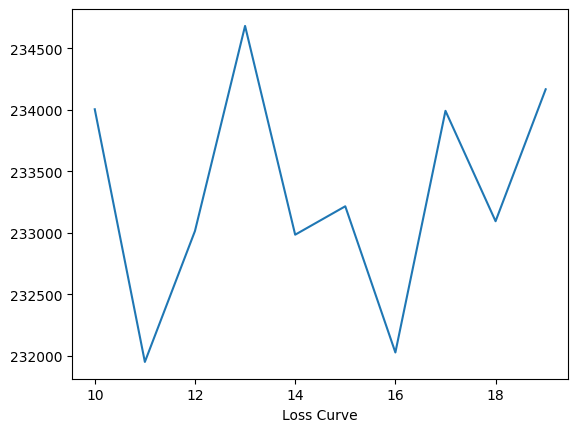

In [5]:
# Question 3

loss_curve = []
iters = range(10,20)
for i in iters:
    idx, centroids = k_means(X, 10, i)
    loss = 0
    for j in range(X.shape[0]):
        a = X[j]
        b = centroids[int(idx[j][0])]
        loss += np.sum(np.power(a-b,2))
    print("iter=",i)
    print("loss=",loss)
    loss_curve.append(loss)

plt.plot(iters, loss_curve)
plt.xlabel('Loss Curve')

(4000, 784)

(2000, 784)
idx:
(2000, 1)

centroids:
(30, 784)


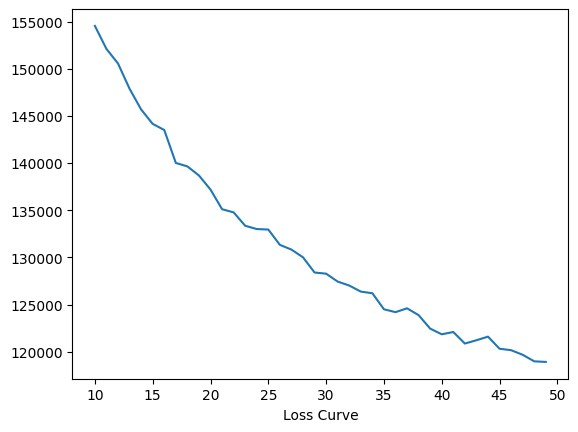

In [12]:
# Question 4

X_train = data[:4000,1:]
X_test = data[:2000,1:]
print(X_train.shape)
print("")
print(X_test.shape)

loss_curve = []
ks = range(10,50)
for i in ks:
    idx, centroids = k_means(X_train, i, 16)
    loss = 0
    for j in range(X_train.shape[0]):
        a = X[j]
        b = centroids[int(idx[j][0])]
        loss += np.sum(np.power(a-b,2))
#     print("k=",i)
#     print("loss=",loss)
    loss_curve.append(loss)

plt.plot(ks, loss_curve)
plt.xlabel('Loss Curve')


idx, centroids = k_means(X_test, 30, 16)
print("idx:")
print(idx.shape)
print("")
print("centroids:")
print(centroids.shape)

In [14]:
# Question 5

def gaussian_2d(x1, y1, x2, y2, ga):
    gau = np.exp(-ga*((x1-x2)**2 + (y1-y2)**2))

    return gau

def laplace_array(Xi,Xj,gamma):

    S = np.zeros((len(Xi),len(Xj)))

    for i in range(len(Xi)):
        for j in range(len(Xj)):
            S[i][j] = gaussian_2d(Xi[i],Xj[i],Xi[j],Xj[j],gamma)

    D = np.sum(S, axis=1)
    D = np.squeeze(np.array(D))
    D = np.diag(D)

    return D-S

def ratio_cut(laplace,k):

    val, vec = np.linalg.eig(laplace)
    id = np.argsort(val)
    topk_vecs = vec[:,id[0:k:1]]

    Sqrt = np.array(topk_vecs) * np.array(topk_vecs)

    divMat = np.tile(np.sqrt(np.transpose(sum(np.transpose(Sqrt)))), (2, 1))
    divMat = np.transpose(divMat)

    F = np.array(topk_vecs) / divMat

    return F

X = data[:500,1:]
std = standardize(X)
cov = np.cov(std, rowvar=False)
eigen_values, eigen_vectors = np.linalg.eig(cov)
projection_matrix = projectionMatrix(eigen_vectors, 2)
X = np.dot(std, projection_matrix)
print(X.shape)

Xi = X[:, 0]
Xj = X[:, 1]
gamma = 10 ** 3
L = laplace_array(Xi, Xj, gamma)
F = ratio_cut(L, 2)
idx, centroids = k_means(F, 5, 100)
print(idx.shape)
print(centroids.shape)

(500, 2)


C:\Users\zanli\AppData\Local\Temp\ipykernel_10844\2458897569.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  S[i][j] = gaussian_2d(Xi[i],Xj[i],Xi[j],Xj[j],gamma)
C:\Users\zanli\AppData\Local\Temp\ipykernel_10844\2458897569.py:33: RuntimeWarning: divide by zero encountered in divide
  F = np.array(topk_vecs) / divMat
C:\Users\zanli\AppData\Local\Temp\ipykernel_10844\2458897569.py:33: RuntimeWarning: invalid value encountered in divide
  F = np.array(topk_vecs) / divMat
C:\Users\zanli\AppData\Local\Temp\ipykernel_10844\4242651224.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  centroids[i] = (np.sum(data, axis=0))/len(data)


(500, 1)
(4, 2)
